In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from tqdm import tqdm
%matplotlib inline

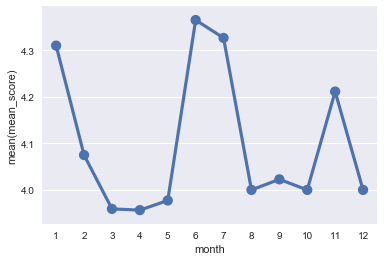

In [15]:
reviews = pd.read_html('../mon_reviews.html', header=0)[0]
# stars = reviews[['date', 'stars']].sort_values(by=['date'])
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['year'], reviews['month'] = reviews['date'].dt.year, reviews['date'].dt.month
reviews = reviews[reviews['year']==2017]
mean_stars = reviews.groupby(['year', 'month'], as_index=False)['stars'].agg({"mean_score": "mean"})
ax = sns.pointplot(x='month', y='mean_score', data=mean_stars)

In [16]:
#list(reviews['user_id'])

In [17]:
# reviews = pd.read_html('gordon_reviews.html', header=0)[0]
# stars = reviews[['date', 'stars']].sort_values(by=['date'])
# stars['date'] = pd.to_datetime(stars['date'])
# stars['year'], stars['month'] = stars['date'].dt.year, stars['date'].dt.month
# stars = stars[stars['year']>=2015]
# mean_stars = stars.groupby(['year', 'month'], as_index=False)['stars'].agg({"mean_score": "mean"})
# ax = sns.pointplot(x='month', y='mean_score', hue='year', data=mean_stars)

In [18]:
low_reviews = reviews[(reviews['year']==2017) & (reviews['month'].isin([3,4,5]))]
low_reviews.head()

,id,business_id,user_id,stars,date,text,useful,funny,cool,year,month
19,-BapNk1B4IuTDZUxKdbYnQ,4JNXUYY8wbaaDmk3BPzlWw,EMMKdK1cGrLSo08wgSYHJQ,3,2017-04-19,As much as people I know have raved about thei...,2,0,0,2017,4
58,-tRXFjeMjpX7qAv1_EcT7g,4JNXUYY8wbaaDmk3BPzlWw,SRMOslD85xkPQzfMIUsQNQ,2,2017-04-23,We are here on a Saturday night. The atmospher...,0,0,0,2017,4
71,-YPzsFf8dzmVTRwekNnFDA,4JNXUYY8wbaaDmk3BPzlWw,WgRKynZBQSdrSYOCAf3JXg,2,2017-05-14,First had reservations and still had to wait 3...,0,0,0,2017,5
100,0cUaPoyrcyf-GDukR75pbQ,4JNXUYY8wbaaDmk3BPzlWw,j5ezF5mEGpnDwdTmAHci7Q,4,2017-03-07,If you've been to Paris... this is a poor subs...,0,0,0,2017,3
103,0dw964e_pXFfGMLuvQZ7zA,4JNXUYY8wbaaDmk3BPzlWw,PXPs4ZY7c77MejUVv6MLVw,5,2017-03-17,Mon Ami Gabi has been a must-stop breakfast sp...,0,0,0,2017,3


In [19]:
list(low_reviews['user_id'])[:5]

['EMMKdK1cGrLSo08wgSYHJQ',
 'SRMOslD85xkPQzfMIUsQNQ',
 'WgRKynZBQSdrSYOCAf3JXg',
 'j5ezF5mEGpnDwdTmAHci7Q',
 'PXPs4ZY7c77MejUVv6MLVw']

In [20]:
mon_users = pd.read_csv('../mon_users.csv')
mon_users.head()

,id,name,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,--8ELb8W1afbyP21EZStPg,Mi Sou,20,2011-10-25 00:00:00,0,0,0,0,4.13,0,0,0,0,0,0,0,1,1,0,0
1,-0tLDaIzN1Gbxc51Bxad4A,Rana,33,2013-05-14 00:00:00,4,0,0,0,3.35,0,0,0,0,0,0,0,0,0,0,0
2,-9ZFoRZpBAsf1ckY3aeyrg,Alexandra,91,2013-01-14 00:00:00,5,0,1,2,3.88,1,1,0,0,0,1,5,5,5,5,0
3,-9_Nz6wJ9Rj0q7kq6YJ-MA,Olga,125,2013-05-26 00:00:00,4,0,6,5,3.97,5,0,0,0,0,1,2,10,10,2,2
4,-AkgXdzDcdEvyXgKYJQW4w,Karli,322,2013-01-09 00:00:00,2,2,2,15,4.05,7,0,0,2,0,1,9,7,7,6,5


In [21]:
users = mon_users.drop(['id', 'name', 'yelping_since'], axis=1)
users.head()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,20,0,0,0,0,4.13,0,0,0,0,0,0,0,1,1,0,0
1,33,4,0,0,0,3.35,0,0,0,0,0,0,0,0,0,0,0
2,91,5,0,1,2,3.88,1,1,0,0,0,1,5,5,5,5,0
3,125,4,0,6,5,3.97,5,0,0,0,0,1,2,10,10,2,2
4,322,2,2,2,15,4.05,7,0,0,2,0,1,9,7,7,6,5


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

x = users.values
scaler = StandardScaler()
x = scaler.fit_transform(x)
kmeans = KMeans(n_clusters=2, random_state=1).fit(x)
pred = kmeans.predict(x)
np.where(pred>0)

(array([197, 311, 489]),)

In [23]:
#DBSCAN
dbscan = DBSCAN(eps=2)
pred = dbscan.fit_predict(x)
influencers = np.where(pred==-1)[0]
influencers

array([  9,  15,  54,  87, 119, 156, 177, 197, 214, 259, 296, 302, 311,
       330, 333, 335, 368, 429, 489, 559, 562, 573])

In [24]:
influ = list(mon_users.iloc[influencers, :]['id'])

In [25]:
reviews.head()

,id,business_id,user_id,stars,date,text,useful,funny,cool,year,month
19,-BapNk1B4IuTDZUxKdbYnQ,4JNXUYY8wbaaDmk3BPzlWw,EMMKdK1cGrLSo08wgSYHJQ,3,2017-04-19,As much as people I know have raved about thei...,2,0,0,2017,4
44,-Lk8DRj59iWk09iXGugSmA,4JNXUYY8wbaaDmk3BPzlWw,q3eLont3I-8fBKbekmX_xg,5,2017-10-14,"Love, love, love this place! We go every time ...",0,0,0,2017,10
47,-NQ4dmUjBjpauRmydtROHg,4JNXUYY8wbaaDmk3BPzlWw,EK8lYaib-nW6RH1VxapA-g,5,2017-01-30,Gotta hand it to them.. They get packed but ca...,0,0,0,2017,1
58,-tRXFjeMjpX7qAv1_EcT7g,4JNXUYY8wbaaDmk3BPzlWw,SRMOslD85xkPQzfMIUsQNQ,2,2017-04-23,We are here on a Saturday night. The atmospher...,0,0,0,2017,4
71,-YPzsFf8dzmVTRwekNnFDA,4JNXUYY8wbaaDmk3BPzlWw,WgRKynZBQSdrSYOCAf3JXg,2,2017-05-14,First had reservations and still had to wait 3...,0,0,0,2017,5


In [26]:
reviews[(reviews['month'].isin([8,9,10])) & (reviews['year']==2017)].groupby("stars").count()

,id,business_id,user_id,date,text,useful,funny,cool,year,month
stars,,,,,,,,,,
1,5,5,5,5,5,5,5,5,5,5
2,13,13,13,13,13,13,13,13,13,13
3,22,22,22,22,22,22,22,22,22,22
4,43,43,43,43,43,43,43,43,43,43
5,64,64,64,64,64,64,64,64,64,64


In [27]:
reviews[(reviews['month'].isin([6,7])) & (reviews['year']==2017)].groupby("stars").count()

,id,business_id,user_id,date,text,useful,funny,cool,year,month
stars,,,,,,,,,,
1,4,4,4,4,4,4,4,4,4,4
2,2,2,2,2,2,2,2,2,2,2
3,6,6,6,6,6,6,6,6,6,6
4,34,34,34,34,34,34,34,34,34,34
5,58,58,58,58,58,58,58,58,58,58


In [28]:
#reading reviews files for all 5 top restaurants
files = glob.glob('../*.html')
df = pd.DataFrame()
for file in tqdm(files):
    reviews = pd.read_html(file, header=0)[0]
    if df.shape[0] == 0:
        df = reviews
    else:
        df = df.append(reviews)

100%|██████████| 10/10 [01:21<00:00,  8.19s/it]


In [29]:
df.shape

(29351, 9)

In [30]:
df.head()

,id,business_id,user_id,stars,date,text,useful,funny,cool
0,-5fjbaALbCP_6TmRJzo0xg,0W4lkclzZThpx3V65bVgig,VZyjSfNkd-TZWiJK9SIOPw,5,2015-03-03 00:00:00,"The smoked meat sandwich is simple, but oh-so-...",0,0,0
1,-5oCsX651HT2KqYh3IsQlg,0W4lkclzZThpx3V65bVgig,RkVNb4DpKwehS3FAziAMVA,2,2012-08-06 00:00:00,This update is reviewing the take out section ...,2,0,0
2,-8kJZvQdYA_pzIsX9lRiCQ,0W4lkclzZThpx3V65bVgig,dnHvmhmUgO2eLn-oJZdQbA,5,2016-07-05 00:00:00,I realize this is very much hyped -- a stop fo...,0,0,0
3,-BT5-Ah24oJnvAoUaB5zWA,0W4lkclzZThpx3V65bVgig,fMPtHRh-I40K6-RI__-VVQ,5,2014-02-25 00:00:00,Does this place really need an introduction? I...,0,0,2
4,-cE93NNMbMshQ1snc22fwg,0W4lkclzZThpx3V65bVgig,7eFy-LxZuvS2K6PAQoibBA,3,2014-07-15 00:00:00,"Schwartz's smoked meat eh? Coming from NYC, th...",2,0,0


Text(0,0.5,'Count')

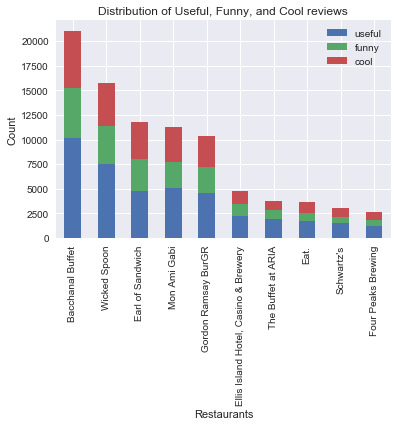

In [31]:
b_ids = df['business_id'].unique()
restaurants = pd.read_csv('../restaurants.csv')
names = restaurants[restaurants['id'].isin(b_ids)]
data = pd.merge(df, names, left_on=['business_id'], right_on = ['id'], how = 'inner')
data = data.groupby('name')['useful', 'funny', 'cool'].sum()
data['total'] = data.sum(axis=1)
data.sort_values(by='total', ascending=False, inplace=True)
ax = data.iloc[:,:-1].plot(kind='bar', stacked=True)
ax.set_title('Distribution of Useful, Funny, and Cool reviews')
ax.set_xlabel('Restaurants')
ax.set_ylabel('Count')

In [32]:
## print all users to 
l = df['user_id'].unique()
print(len(l))
with open("temp.txt","w") as outfile:
    for item in l:
        outfile.write("\'%s\',\n"% item)

23782


In [33]:
df['user_id'].unique().shape

(23782,)

In [34]:
mon_users['id'].unique().shape

(579,)

In [44]:
### read all user data
all_users = pd.read_csv("../top_rated_res_user.csv", sep = ",")
all_users.shape
users = all_users.drop(['id', 'name', 'yelping_since'], axis=1)
users[users['review_count'] > 5000]

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
2840,7764,123,139,113,272,3.49,36,23,7,4,14,137,219,97,97,67,78
7485,5344,3905,3876,3847,397,3.93,2104,183,246,113,232,1028,6677,3624,3624,1165,338
7807,8353,22628,19263,19369,417,3.58,1294,379,252,19,39,708,2312,1797,1797,933,819
17081,6653,1444,1142,1167,237,3.32,92,39,12,2,1,208,496,288,288,78,89


## Clustering analysis to find outlying users across 5 most reviewed restaurants

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

x = users.values
scaler = StandardScaler()
# x = scaler.fit_transform(x)
kmeans = KMeans(n_clusters=2, random_state=1).fit(x)
pred = kmeans.predict(x)
print(set(pred))
print("cluster = 0", len(pred[np.where(pred == 0)[0]]) )
print("cluster = 1", len(pred[np.where(pred == 1)[0]]) )
# we see that the class 1 are outliers

{0, 1}
cluster = 0 18525
cluster = 1 66


In [46]:
## analysing outliers in detail
outliers = np.where(pred == 1)[0]
users.iloc[outliers,:].tail()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
17383,558,24535,10353,18462,183,3.55,266,51,15,5,6,571,777,718,718,335,318
17580,3253,48621,29166,38033,1266,3.42,2832,315,348,126,220,2968,11276,5481,5481,1251,451
17662,761,17478,17469,17413,196,4.44,2982,254,506,317,166,1073,2951,3326,3326,1399,2700
17756,672,17608,17329,17569,63,3.47,315,22,11,1,5,164,916,625,625,115,16
17809,2159,24482,24027,25391,567,3.83,18812,1013,1543,1443,357,3038,6724,11404,11404,4222,6771


In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_red = pca.fit_transform(x)
print("Variance Explained :", np.sum(pca.explained_variance_ratio_), pca.explained_variance_ratio_)

Variance Explained : 0.9629267095396812 [0.93079208 0.03213463]


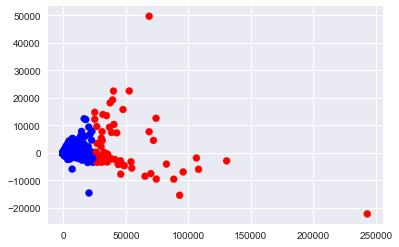

In [48]:
color = ['r' if c == 1 else 'b' for c in pred]
plt.scatter(x = x_red[:,0], y = x_red[:,1], c= color)

In [40]:
x = users.values
scaler = StandardScaler()
x = scaler.fit_transform(x)
dbscan = DBSCAN(min_samples=20, eps = 0.01, metric="cosine", algorithm='brute').fit(x)
pred = dbscan.fit_predict(x)
print(set(pred))
print("cluster = 0", len(pred[np.where(pred == 0)[0]]) )
print("cluster = 1", len(pred[np.where(pred == 1)[0]]) )
print("cluster = -1", len(pred[np.where(pred == -1)[0]]) )

{0, -1}
cluster = 0 12982
cluster = 1 0
cluster = -1 5609


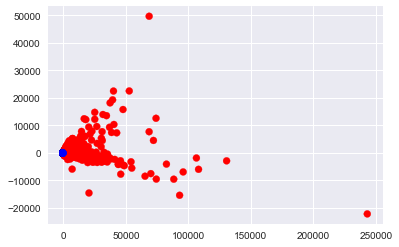

In [41]:
# print(list(pred))
color = ['r' if c == -1 else 'b' for c in pred]
plt.scatter(x = x_red[:,0], y = x_red[:,1], c= color)

In [42]:
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components = 2, metric = 'cosine', n_iter = 250)
# x_red = tsne.fit_transform(x)
# print("divergence :",kl_divergence_)

In [43]:
# color = ['r' if c == -1 else 'b' for c in pred]
# plt.scatter(x = x_red[:,0], y = x_red[:,1], c= color)
outliers = np.where(pred == -1)[0]
users.iloc[outliers,:].head()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,214,64,6,4,11,3.91,11,6,0,0,0,5,20,18,18,9,2
6,372,351,51,32,33,3.82,20,3,0,3,0,17,33,19,19,7,2
17,214,9,12,9,5,4.11,4,7,0,1,1,3,5,11,11,6,1
20,315,23,23,3,26,3.70,13,5,0,0,0,5,17,29,29,12,2
24,408,820,753,746,83,3.67,1004,91,72,80,32,200,1038,1209,1209,333,249


In [43]:
x = users.values
scaler = StandardScaler()
x = scaler.fit_transform(x)
dbscan = DBSCAN(min_samples=5, eps = 40, metric="manhattan").fit(x)
pred = dbscan.fit_predict(x)
print(set(pred))
print("cluster = 0", len(pred[np.where(pred == 0)[0]]) )
print("cluster = 1", len(pred[np.where(pred == 1)[0]]) )
print("cluster = -1", len(pred[np.where(pred == -1)[0]]) )

NameError: name 'users' is not defined

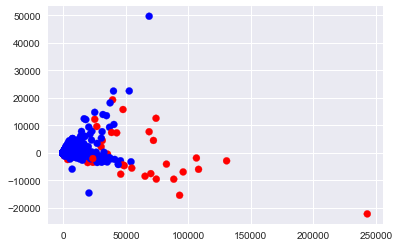

In [45]:
# print(list(pred))
color = ['r' if c == -1 else 'b' for c in pred]
plt.scatter(x = x_red[:,0], y = x_red[:,1], c= color)

In [111]:
def get_rolling(file):
    reviews = pd.read_html(file, header=0)[0]
    reviews['date'] = pd.to_datetime(reviews['date'])
    reviews['year'], reviews['month'] = reviews['date'].dt.year, reviews['date'].dt.month
    reviews = reviews.sort_values(by=['date'])
    thres = 30
    reviews['stars_rolling_before'] = reviews['stars'].rolling(thres).mean()
    reviews = reviews.sort_values(by=['date'], ascending=False)
    reviews['stars_rolling_after'] = reviews['stars'].rolling(thres).mean()
    reviews = reviews.sort_values(by=['date'])
#     outliers = np.where(pred == -1)[0]
#     all_users.iloc[outliers,:].head()
    influencers_ids = list(all_users.iloc[outliers,:]['id'])
    influencers_reviews = reviews[reviews['user_id'].isin(influencers_ids)]
    influencers_reviews = influencers_reviews.sort_values(by=['date'])
    influencers_reviews = influencers_reviews.dropna()
#     influencers_reviews['stars_rolling_before'].values
    before, after = influencers_reviews['stars_rolling_before'].values, influencers_reviews['stars_rolling_after'].values
    mean_star_diff = np.diff([before, after], axis=0)
    return mean_star_diff[0]

In [112]:
print(len(outliers))

66


In [47]:
files = glob.glob('../*.html')
# mean_diff = {str(i): None for i in files}
print(files)
mean_diff = []
for file in tqdm([files[4]]):
    mean_diff.append(get_rolling(file))
    

  0%|          | 0/1 [00:00<?, ?it/s]

['../schwartz_reviews.html', '../aria_reviews.html', '../eat_reviews.html', '../fourpeaks_reviews.html', '../earl_reviews.html', '../bacchanal_reivews.html', '../wicked_reviews.html', '../ellis_reviews.html', '../mon_reviews.html', '../gordon_reviews.html']


100%|██████████| 1/1 [00:11<00:00, 11.51s/it]


In [48]:
diff = [j for i in mean_diff for j in i]

In [49]:
from scipy import stats
stats.ttest_1samp(diff,0)

Ttest_1sampResult(statistic=0.03052340232818107, pvalue=0.9756529203478516)

In [50]:
review_counts = pd.read_csv('../restaurants.csv')
review_counts = review_counts[review_counts['review_count'] <= 2000]
review_counts.sort_values(by=['review_count'], ascending=False, inplace=True)
df = review_counts.iloc[:5, :]
list(df['id'])

['JzOp695tclcNCNMuBl7oxA',
 'LR0qF0FEVsCOhYWUOiH26A',
 '0W4lkclzZThpx3V65bVgig',
 'EAwh1OmG6t6p3nRaZOW_AA',
 'l_GV0hgEoTUf70uJVT0_hg']

In [51]:
df

,id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open
26407,JzOp695tclcNCNMuBl7oxA,Four Peaks Brewing,NaN,"1340 E 8th St, Ste 104",Tempe,AZ,85281,33.4196,-111.9160,4.5,1965,1
29391,LR0qF0FEVsCOhYWUOiH26A,The Buffet at ARIA,The Strip,3743 Las Vegas Blvd S,Las Vegas,NV,89109,36.1071,-115.1780,3.0,1961,1
1651,0W4lkclzZThpx3V65bVgig,Schwartz's,Plateau-Mont-Royal,3895 Boulevard Saint-Laurent,Montréal,QC,H2W 1X9,45.5164,-73.5775,4.0,1953,1
16597,EAwh1OmG6t6p3nRaZOW_AA,"Ellis Island Hotel, Casino & Brewery",Eastside,4178 Koval Ln,Las Vegas,NV,89109,36.1130,-115.1630,4.0,1946,1
29916,l_GV0hgEoTUf70uJVT0_hg,Eat.,Downtown,707 Carson Ave,Las Vegas,NV,89101,36.1667,-115.1390,4.0,1941,1


In [30]:
reviews = pd.read_html('../mon_reviews.html', header=0)[0]

In [31]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['year'], reviews['month'] = reviews['date'].dt.year, reviews['date'].dt.month
reviews = reviews.sort_values(by=['date'])
reviews.head()

,id,business_id,user_id,stars,date,text,useful,funny,cool,year,month
3250,ojCMmtgJPvw6yaIDpUYZmw,4JNXUYY8wbaaDmk3BPzlWw,qEYG5IE5dTekjIhdoV31bQ,5,2005-10-10,If you enjoy a little people watching with you...,0,0,0,2005,10
1461,diaVB93Is7yYD-ajYQKvqw,4JNXUYY8wbaaDmk3BPzlWw,k2zuwaAne-FhHd8M6bXnyQ,5,2005-10-15,"affordable, fairly classic french food sit out...",2,2,2,2005,10
598,6HswqFO2yndpRGCe2gIAwg,4JNXUYY8wbaaDmk3BPzlWw,gjhzKWsqCIrpEd9pevbKZw,4,2005-12-02,Though heartbroken and a bit aimless on my 22n...,3,2,3,2005,12
1404,d2IvFpPFBs6trRqVkqyjbg,4JNXUYY8wbaaDmk3BPzlWw,8-lLoii2bEEB_IDJlryyDw,4,2006-01-07,"The food and wine was amazing, but the super h...",1,0,0,2006,1
2881,M99598wD-2oEQhGru_GvEQ,4JNXUYY8wbaaDmk3BPzlWw,_W4y7ku6Q0uGoiI3ePtkgQ,5,2006-01-31,Yippy! Make-your-own bloody mary bar! Chose th...,0,1,0,2006,1


In [32]:
reviews['prev_date'] = reviews['date'] + pd.DateOffset(days=-15)
reviews['after_date'] = reviews['date'] + pd.DateOffset(days=15)

In [33]:
reviews['star_before']=''
reviews['star_after']=''
reviews.head()

,id,business_id,user_id,stars,date,text,useful,funny,cool,year,month,prev_date,after_date,star_before,star_after
3250,ojCMmtgJPvw6yaIDpUYZmw,4JNXUYY8wbaaDmk3BPzlWw,qEYG5IE5dTekjIhdoV31bQ,5,2005-10-10,If you enjoy a little people watching with you...,0,0,0,2005,10,2005-09-25,2005-10-25,,
1461,diaVB93Is7yYD-ajYQKvqw,4JNXUYY8wbaaDmk3BPzlWw,k2zuwaAne-FhHd8M6bXnyQ,5,2005-10-15,"affordable, fairly classic french food sit out...",2,2,2,2005,10,2005-09-30,2005-10-30,,
598,6HswqFO2yndpRGCe2gIAwg,4JNXUYY8wbaaDmk3BPzlWw,gjhzKWsqCIrpEd9pevbKZw,4,2005-12-02,Though heartbroken and a bit aimless on my 22n...,3,2,3,2005,12,2005-11-17,2005-12-17,,
1404,d2IvFpPFBs6trRqVkqyjbg,4JNXUYY8wbaaDmk3BPzlWw,8-lLoii2bEEB_IDJlryyDw,4,2006-01-07,"The food and wine was amazing, but the super h...",1,0,0,2006,1,2005-12-23,2006-01-22,,
2881,M99598wD-2oEQhGru_GvEQ,4JNXUYY8wbaaDmk3BPzlWw,_W4y7ku6Q0uGoiI3ePtkgQ,5,2006-01-31,Yippy! Make-your-own bloody mary bar! Chose th...,0,1,0,2006,1,2006-01-16,2006-02-15,,


In [34]:
# test = reviews.iloc[:100, :]
l1 = []
l2 = []
for i in tqdm(range(reviews.shape[0])):
    before_date = reviews.iloc[i, :]['prev_date']
    curr_date = reviews.iloc[i, :]['date']
    after_date = reviews.iloc[i, :]['after_date']
    blah = reviews[(reviews['date']>=before_date) & (reviews['date']<curr_date)]['stars'].mean()
    l1.append(reviews[(reviews['date']>=before_date) & (reviews['date']<curr_date)]['stars'].mean())
    l2.append(reviews[(reviews['date']>curr_date) & (reviews['date']<=after_date)]['stars'].mean())
    
reviews["star_before"] = l1
reviews["star_after"] = l2

100%|██████████| 5270/5270 [00:22<00:00, 233.99it/s]


100%|██████████| 5/5 [01:02<00:00, 12.53s/it]


In [113]:
thres = 30

def get_rolling(df, thres, outliers):
#     reviews = pd.read_html(file, header=0)[0]
    reviews = df
    reviews['date'] = pd.to_datetime(reviews['date'])
    reviews['year'], reviews['month'] = reviews['date'].dt.year, reviews['date'].dt.month
    reviews = reviews.sort_values(by=['date'])
    reviews['prev_date'] = reviews['date'] + pd.DateOffset(days=-thres)
    reviews['after_date'] = reviews['date'] + pd.DateOffset(days=thres)
    reviews['star_before']=''
    reviews['star_after']=''
    l1, l2 = [], []

    for i in range(reviews.shape[0]):
        before_date = reviews.iloc[i, :]['prev_date']
        curr_date = reviews.iloc[i, :]['date']
        after_date = reviews.iloc[i, :]['after_date']
        l1.append(reviews[(reviews['date']>=before_date) & (reviews['date']<curr_date)]['stars'].mean())
        l2.append(reviews[(reviews['date']>curr_date) & (reviews['date']<=after_date)]['stars'].mean())
    
    reviews["star_before"] = l1
    reviews["star_after"] = l2
    reviews['star_diff'] = reviews["star_after"] - reviews["star_before"]
    
    influencers_ids = list(all_users.iloc[outliers,:]['id'])
    influencers_reviews = reviews[reviews['user_id'].isin(influencers_ids)]
    influencers_reviews = influencers_reviews.dropna()
    return influencers_reviews['star_diff'].values
    
   

In [114]:
all_users = pd.read_csv("../top_rated_res_user.csv", sep = ",")
all_users.shape

(18591, 20)

In [115]:
#reading reviews files for all 5 top restaurants
files = glob.glob('../*.html')
df_list = []
for file in tqdm(files):
    temp_df = pd.read_html(file, header=0)[0]
    df_list.append(temp_df)

100%|██████████| 5/5 [00:59<00:00, 11.83s/it]


In [116]:
mean_diff = []
for reviews_df in tqdm(df_list):
    mean_diff.append(get_rolling(reviews_df, thres, outliers))
mean_diff_total = [j for i in mean_diff for j in i]

100%|██████████| 5/5 [01:05<00:00, 13.07s/it]


In [117]:
print(len(mean_diff_total))
print(len(outliers))

106
66


In [118]:
from scipy import stats
t = stats.ttest_1samp(mean_diff_total,0)
print(t)

Ttest_1sampResult(statistic=1.9431460069551914, pvalue=0.05467593042357695)


In [119]:
sigma  = np.std(mean_diff_total)
n = len(mean_diff_total)
mean = np.mean(mean_diff_total)
conf_interval = stats.norm.interval(0.90, loc = mean, scale=sigma/np.sqrt(n))
conf_interval_len = conf_interval[1] - conf_interval[0]
print(sigma)
print(conf_interval)
print(conf_interval_len)

0.20541982065405323
(0.0061357515166875, 0.07177244056312382)
0.06563668904643633


In [120]:
outliers

array([  360,   395,   594,  1126,  1204,  1388,  1802,  2089,  2128,
        2593,  2710,  2879,  2901,  3018,  3214,  3250,  3334,  3730,
        4025,  4100,  4133,  4144,  4251,  4602,  5225,  5870,  6023,
        6249,  6279,  6380,  6394,  6632,  6709,  6819,  6974,  7274,
        7807,  8736,  9638, 10012, 10733, 10904, 11018, 11104, 11184,
       11384, 11517, 11783, 12127, 12711, 13060, 13213, 13707, 15142,
       15685, 15985, 16012, 16073, 16085, 16222, 16544, 17383, 17580,
       17662, 17756, 17809])